In [96]:
# Initial imports
import os
import requests
import pandas as pd
from pathlib import Path
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import numpy as np
%matplotlib inline
import datetime

In [97]:
# Load .env enviroment variables
load_dotenv('.env')

True

In [49]:
#Reading sp_500
import yfinance as yf
stock = '^GSPC'
sp_500_df = yf.download(stock,'2020-01-03', '2020-10-02')
sp_500_df = pd.DataFrame(df)
sp_500_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3461290000
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3674070000
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3420380000
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3720890000
2020-01-09,3266.030029,3275.580078,3263.669922,3274.699951,3274.699951,3638390000


In [50]:
#Cleaning Sp_500
sp_500_df.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace = True)
sp_500_df.head()

,Close
Date,
2020-01-03,3234.850098
2020-01-06,3246.280029
2020-01-07,3237.179932
2020-01-08,3253.050049
2020-01-09,3274.699951


In [51]:
#Sp_500 Daily Returns
sp_500_daily_returns = sp_500_df.pct_change()
sp_500_daily_returns.head()

,Close
Date,
2020-01-03,NaN
2020-01-06,0.003533
2020-01-07,-0.002803
2020-01-08,0.004902
2020-01-09,0.006655


In [8]:
#Reading BVSP
stock = '^BVSP'
brazil_df = yf.download(stock,'2020-01-03', '2020-10-02')
brazil_df = pd.DataFrame(df)
brazil_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3461290000
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3674070000
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3420380000
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3720890000
2020-01-09,3266.030029,3275.580078,3263.669922,3274.699951,3274.699951,3638390000


In [9]:
#Reading BSESN
stock = '^BSESN'
india_df = yf.download(stock,'2020-01-03', '2020-10-02')
india_df = pd.DataFrame(df)
india_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3461290000
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3674070000
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3420380000
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3720890000
2020-01-09,3266.030029,3275.580078,3263.669922,3274.699951,3274.699951,3638390000


In [29]:
# Reading Coronavirus data csv's
US_csv = Path("Vanguard-Group/usa covid cases.csv")
US_coronavirus_data = pd.read_csv(US_csv, parse_dates = True, infer_datetime_format = True)
US_coronavirus_data.head()

,Date,Confirmed,Deaths
0,1/22/2020,0,0
1,1/22/2020,0,0
2,1/22/2020,0,0
3,1/22/2020,0,0
4,1/22/2020,0,0


In [30]:
#df.groupby(['date'], as_index = False).agg({'muscles': ','.join})
US_coronavirus_data = US_coronavirus_data.groupby(['Date']).sum()
US_coronavirus_data

,Confirmed,Deaths
Date,,
1/22/2020,1,0
1/23/2020,1,0
1/24/2020,2,0
1/25/2020,2,0
1/26/2020,5,0
...,...,...
7/5/2020,2891124,129960
7/6/2020,2936077,130285
7/7/2020,2996098,131480


In [39]:
US_coronavirus_data.index = pd.to_datetime(US_coronavirus_data.index)
US_coronavirus_data

,Confirmed,Deaths
Date,,
2020-01-22,1,0
2020-01-23,1,0
2020-01-24,2,0
2020-01-25,2,0
2020-01-26,5,0
...,...,...
2020-07-05,2891124,129960
2020-07-06,2936077,130285
2020-07-07,2996098,131480


In [53]:
US_coronavirus_data_returns = US_coronavirus_data.pct_change()
US_coronavirus_data_returns.tail()

,Confirmed,Deaths
Date,,
2020-07-05,0.017557,0.002090
2020-07-06,0.015549,0.002501
2020-07-07,0.020443,0.009172
2020-07-08,0.019559,0.006237
2020-07-09,0.020705,0.007483


In [17]:
# Reading Coronavirus data csv's
Brazil_csv = Path("Vanguard-Group/brazil_covid19.csv")
Brazil_coronavirus_data = pd.read_csv(Brazil_csv)
Brazil_coronavirus_data.head()

,date,region,state,cases,deaths
0,2020-02-25,Centro-Oeste,DF,0,0
1,2020-02-25,Centro-Oeste,GO,0,0
2,2020-02-25,Centro-Oeste,MS,0,0
3,2020-02-25,Centro-Oeste,MT,0,0
4,2020-02-25,Nordeste,AL,0,0


In [18]:
# Reading Coronavirus data csv's
India_csv = Path("Vanguard-Group/India Cases Covid.csv")
India_coronavirus_data = pd.read_csv(India_csv)
India_coronavirus_data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,1/2/2020,6:00 PM,Kerala,2,0,0,0,2
3,4,2/2/2020,6:00 PM,Kerala,3,0,0,0,3
4,5,3/2/2020,6:00 PM,Kerala,3,0,0,0,3


In [56]:
#sp_500_daily_returns and US_coronavirus_data_returns
combined_US_returns = pd.concat([sp_500_daily_returns, US_coronavirus_data_returns], axis='columns', join='inner')
combined_US_returns.head()

,Close,Confirmed,Deaths
Date,,,
2020-01-22,0.000289,NaN,NaN
2020-01-23,0.001141,0.0,NaN
2020-01-24,-0.009042,1.0,NaN
2020-01-27,-0.015731,0.0,NaN
2020-01-28,0.010054,0.0,NaN


In [92]:
combined_US_returns.dropna(inplace = True)

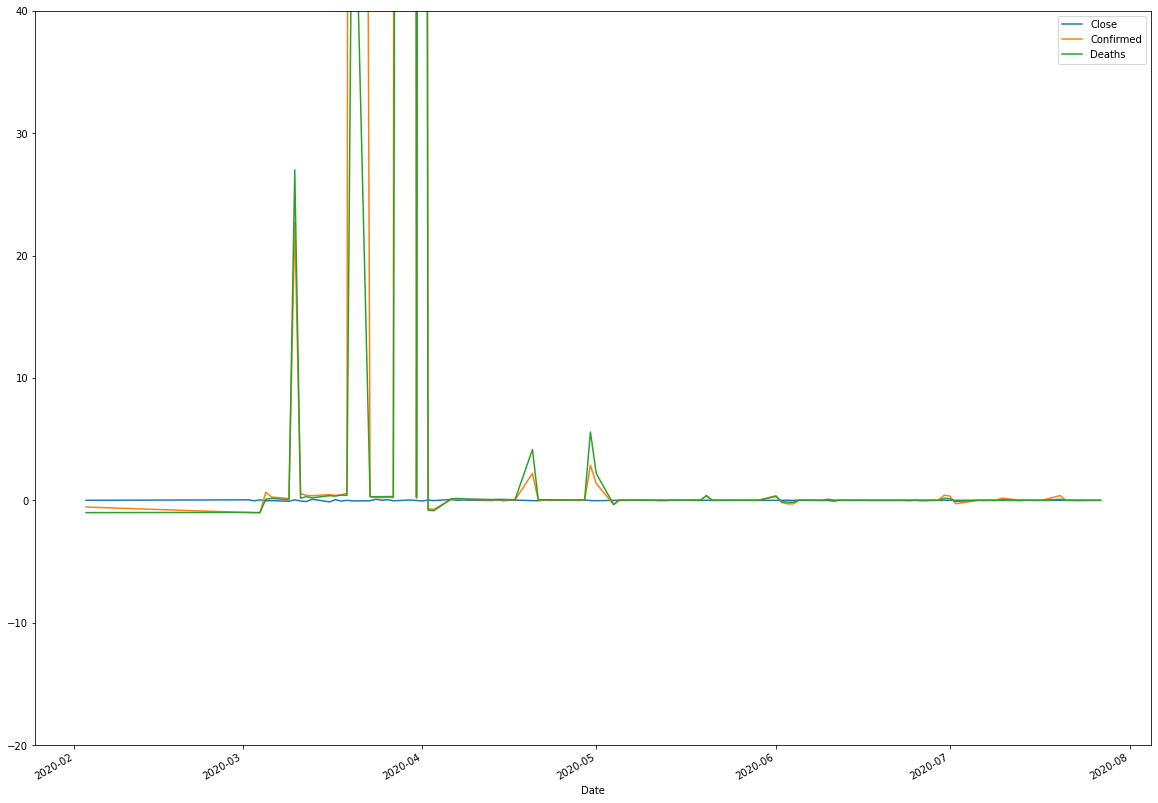

In [93]:
combined_US_returns.plot(kind = 'line', figsize = (20,15), ylim = (-20, 40))

In [94]:
US_correlation = combined_US_returns.corr()
US_correlation

,Close,Confirmed,Deaths
Close,1.000000,0.051573,0.019359
Confirmed,0.051573,1.000000,0.958285
Deaths,0.019359,0.958285,1.000000


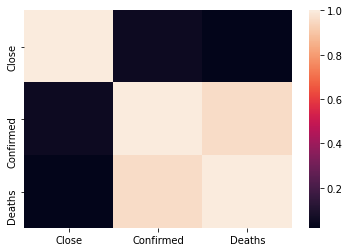

In [95]:
import seaborn as sns
sns.heatmap(US_correlation)

In [ ]:
###### KEVIN BRANCH

In [98]:

#India_csv = Path("Vanguard-Group/India Cases Covid.csv")
India_csv = Path('Vanguard-Group/India Cases Covid.csv')
India_coronavirus_data = pd.read_csv(India_csv, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
India_coronavirus_data.head()

,Sno,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Date,,,,,,,,
2020-01-30,1,6:00 PM,Kerala,1,0,0,0,1
2020-01-31,2,6:00 PM,Kerala,1,0,0,0,1
2020-01-02,3,6:00 PM,Kerala,2,0,0,0,2
2020-02-02,4,6:00 PM,Kerala,3,0,0,0,3
2020-03-02,5,6:00 PM,Kerala,3,0,0,0,3


In [99]:
India_coronavirus_data.drop(columns = ['Sno','Time','State/UnionTerritory','ConfirmedIndianNational','ConfirmedForeignNational','Cured'], inplace = True)
India_coronavirus_data.rename(columns={'Deaths' : 'India Deaths', 'Confirmed' : 'India Confirmed'}, inplace = True)

In [100]:
India_coronavirus_data.isnull().sum()

India Deaths       0
India Confirmed    0
dtype: int64

In [101]:
India_coronavirus_data = India_coronavirus_data.groupby([India_coronavirus_data.index]).sum()
India_coronavirus_data.head()

,India Deaths,India Confirmed
Date,,
2020-01-02,0,2
2020-01-03,0,3
2020-01-04,41,1834
2020-01-05,1152,34972
2020-01-06,5394,190535


In [102]:
India_coronavirus_data = India_coronavirus_data.pct_change()
India_coronavirus_data

,India Deaths,India Confirmed
Date,,
2020-01-02,NaN,NaN
2020-01-03,NaN,0.500000
2020-01-04,inf,610.333333
2020-01-05,27.097561,18.068702
2020-01-06,3.682292,4.448216
...,...,...
2020-12-05,7.399267,7.376465
2020-12-06,2.706062,3.205085
2020-12-07,1.668157,1.855304


In [108]:
stock = '^BSESN'
sensex = yf.download(stock,'2020-01-01', '2020-10-02')
sensex_df = pd.DataFrame(sensex)

[*********************100%***********************]  1 of 1 completed


In [109]:
sensex_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,41340.269531,41649.289062,41328.449219,41626.640625,41626.640625,5300
2020-01-03,41634.511719,41636.179688,41348.679688,41464.609375,41464.609375,8900
2020-01-06,41378.339844,41378.339844,40613.960938,40676.628906,40676.628906,8700
2020-01-07,40983.039062,41230.140625,40727.371094,40869.468750,40869.468750,11900
2020-01-08,40574.828125,40866.359375,40476.550781,40817.738281,40817.738281,18200


In [110]:
sensex_df.drop(columns =['Open','High','Low','Adj Close','Volume'], inplace = True)

In [111]:
sensex_df = sensex_df.groupby(by=[sensex_df.index]).sum()

In [112]:
sensex_df = sensex_df.pct_change()

In [113]:

sensex_df

,Close
Date,
2020-01-02,NaN
2020-01-03,-0.003892
2020-01-06,-0.019004
2020-01-07,0.004741
2020-01-08,-0.001266
...,...
2020-09-25,0.022845
2020-09-28,0.015860
2020-09-29,-0.000221


In [114]:
india = pd.concat([sensex_df, India_coronavirus_data], join ='inner', axis = 'columns')

In [115]:
india.dropna(inplace = True)

In [116]:
india.head()

,Close,India Deaths,India Confirmed
Date,,,
2020-01-06,-0.019004,3.682292,4.448216
2020-01-07,0.004741,2.225806,2.072889
2020-01-08,-0.001266,1.098333,1.896684
2020-01-09,0.015547,0.788173,1.176410
2020-01-30,-0.006914,-1.000000,-1.000000


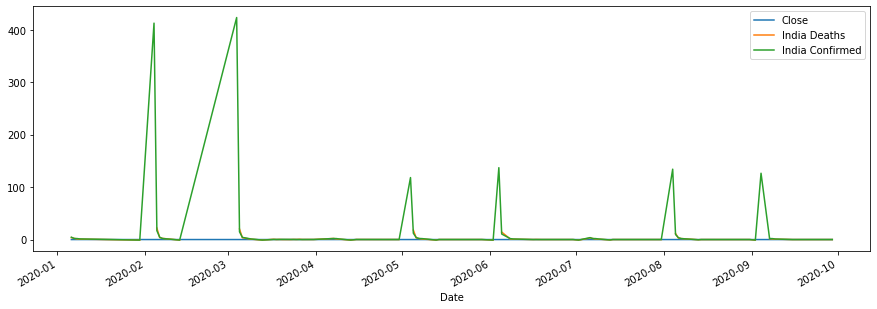

In [117]:
india.plot(figsize = (15,5))

In [118]:
india_correlation = india.corr()
india_correlation

,Close,India Deaths,India Confirmed
Close,1.000000,0.008104,-0.006503
India Deaths,0.008104,1.000000,0.985841
India Confirmed,-0.006503,0.985841,1.000000


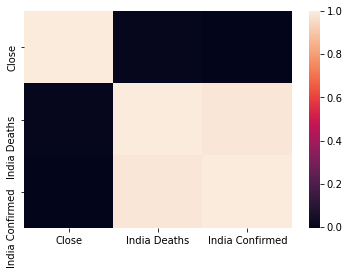

In [119]:
import seaborn as sns
sns.heatmap(india_correlation)

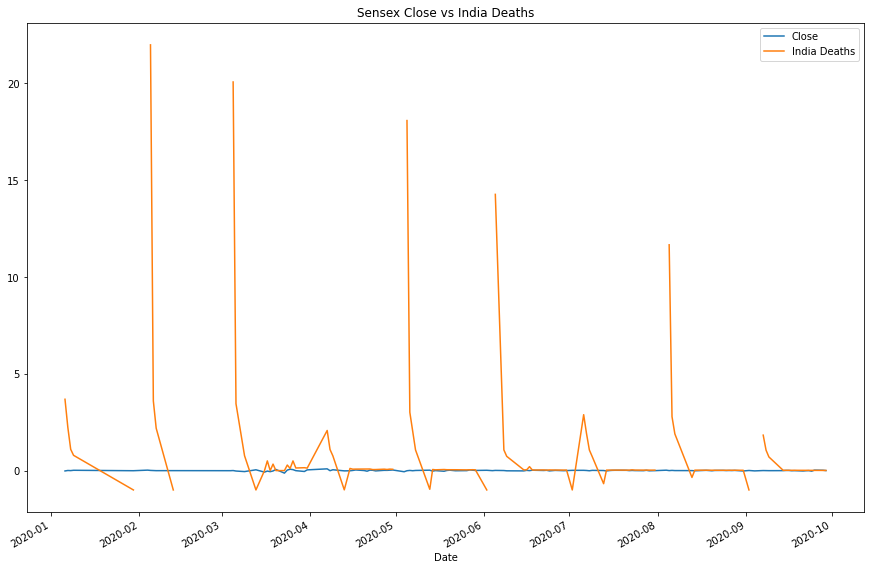

In [243]:
india[['Close', 'India Deaths']].plot(title = 'Sensex Close vs India Deaths', figsize = (15,10))

In [ ]:
##### ROMAN BRANCH ######

In [121]:
Brazil_csv = Path("Vanguard-Group/brazil_covid19.csv")
Brazil_coronavirus_data = pd.read_csv(Brazil_csv, index_col = 'date', parse_dates = True, infer_datetime_format = True)
Brazil_coronavirus_data.head()

,region,state,cases,deaths
date,,,,
2020-02-25,Centro-Oeste,DF,0,0
2020-02-25,Centro-Oeste,GO,0,0
2020-02-25,Centro-Oeste,MS,0,0
2020-02-25,Centro-Oeste,MT,0,0
2020-02-25,Nordeste,AL,0,0


In [122]:

# pandas drop columns using list of column names
Brazil_coronavirus_data.drop(['region', 'state'], axis=1)

,cases,deaths
date,,
2020-02-25,0,0
2020-02-25,0,0
2020-02-25,0,0
2020-02-25,0,0
2020-02-25,0,0
...,...,...
2020-09-30,264783,18487
2020-09-30,985628,35622
2020-09-30,178898,4485


In [123]:

Brazil_coronavirus_data = Brazil_coronavirus_data.groupby(Brazil_coronavirus_data.index).sum()

In [124]:
#Brazil_coronavirus_data.isnull().sum()
Brazil_coronavirus_returns = Brazil_coronavirus_data.pct_change()
Brazil_coronavirus_returns.head()

,cases,deaths
date,,
2020-02-25,NaN,NaN
2020-02-26,inf,NaN
2020-02-27,0.0,NaN
2020-02-28,0.0,NaN
2020-02-29,1.0,NaN


In [125]:
stock = '^BVSP'
brazil_df = yf.download(stock,'2020-01-03', '2020-10-02')
brazil_df = pd.DataFrame(brazil_df)
brazil_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-03,118564.0,118792.0,117341.0,117707.0,117707.0,6834500
2020-01-06,117707.0,117707.0,116269.0,116878.0,116878.0,6570000
2020-01-07,116872.0,117076.0,115965.0,116662.0,116662.0,4854100
2020-01-08,116667.0,117335.0,115693.0,116247.0,116247.0,5910500
2020-01-09,116248.0,116820.0,115411.0,115947.0,115947.0,5953500


In [126]:
brazil_df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace = True, axis=1)

In [127]:

brazil_df.head()

,Close
Date,
2020-01-03,117707.0
2020-01-06,116878.0
2020-01-07,116662.0
2020-01-08,116247.0
2020-01-09,115947.0


In [128]:

brazil_daily_returns = brazil_df.pct_change()

In [129]:
brazil_daily_returns.head()

,Close
Date,
2020-01-03,NaN
2020-01-06,-0.007043
2020-01-07,-0.001848
2020-01-08,-0.003557
2020-01-09,-0.002581


In [131]:
combined_Brazil_returns = pd.concat([brazil_daily_returns, Brazil_coronavirus_returns], axis='columns', join='inner')

combined_Brazil_returns.head()

,Close,cases,deaths
2020-02-27,-0.094097,0.0,NaN
2020-02-28,0.011536,0.0,NaN
2020-03-02,0.023548,0.0,NaN
2020-03-03,-0.010204,0.0,NaN
2020-03-04,0.015985,0.5,NaN


In [133]:
combined_Brazil_returns.dropna(inplace = True)
combined_Brazil_returns.head()

,Close,cases,deaths
2020-03-17,0.048463,0.243590,inf
2020-03-18,-0.103488,0.470790,3.000000
2020-03-19,0.021481,0.450935,0.500000
2020-03-20,-0.018483,0.455717,0.833333
2020-03-23,-0.052170,0.223157,0.360000


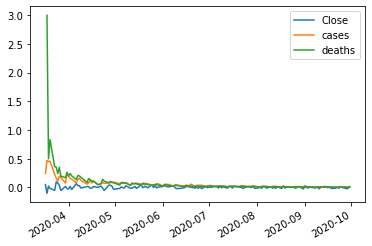

In [134]:
combined_Brazil_returns.plot()

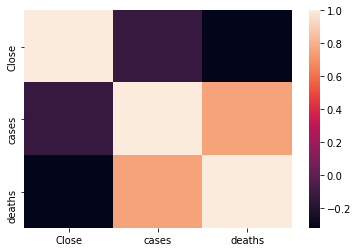

In [136]:
#heatmap
brazil_correlation = combined_Brazil_returns.corr()
import seaborn as sns
sns.heatmap(brazil_correlation)

In [146]:
global_daily_returns = pd.concat([sp_500_daily_returns, brazil_daily_returns, sensex_df], axis='columns', join='inner')
global_daily_returns.columns = [
  'USA Stock Market',
  'Brazil Stock Market',
  'India Stock Market'  
]
global_daily_returns

,USA Stock Market,Brazil Stock Market,India Stock Market
Date,,,
2020-01-03,NaN,NaN,-0.003892
2020-01-06,0.003533,-0.007043,-0.019004
2020-01-07,-0.002803,-0.001848,0.004741
2020-01-08,0.004902,-0.003557,-0.001266
2020-01-09,0.006655,-0.002581,0.015547
...,...,...,...
2020-09-25,0.015977,-0.000134,0.022845
2020-09-28,0.016111,-0.024052,0.015860
2020-09-29,-0.004813,-0.011472,-0.000221


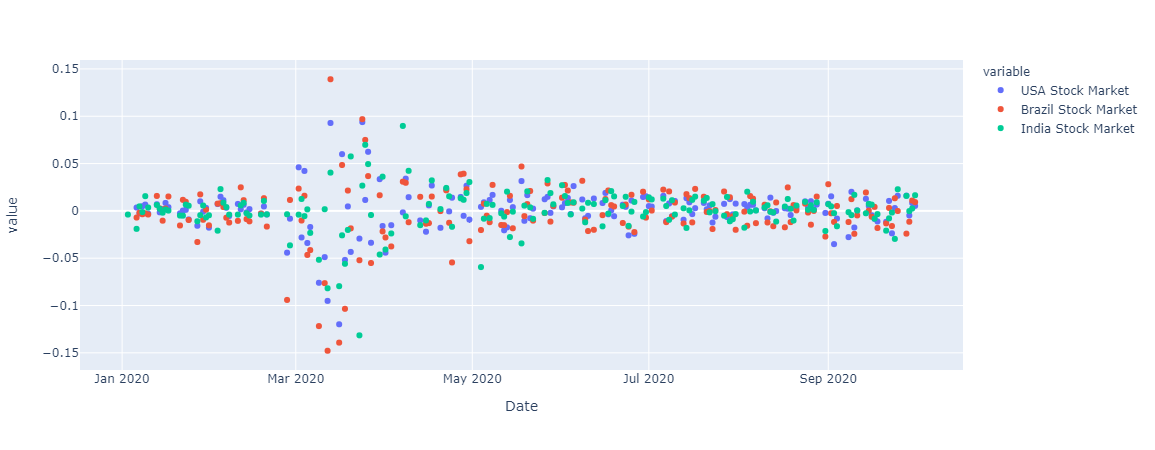

In [225]:
import plotly.express as px
scatter_global_daily_returns = px.scatter(global_daily_returns)
scatter_global_daily_returns

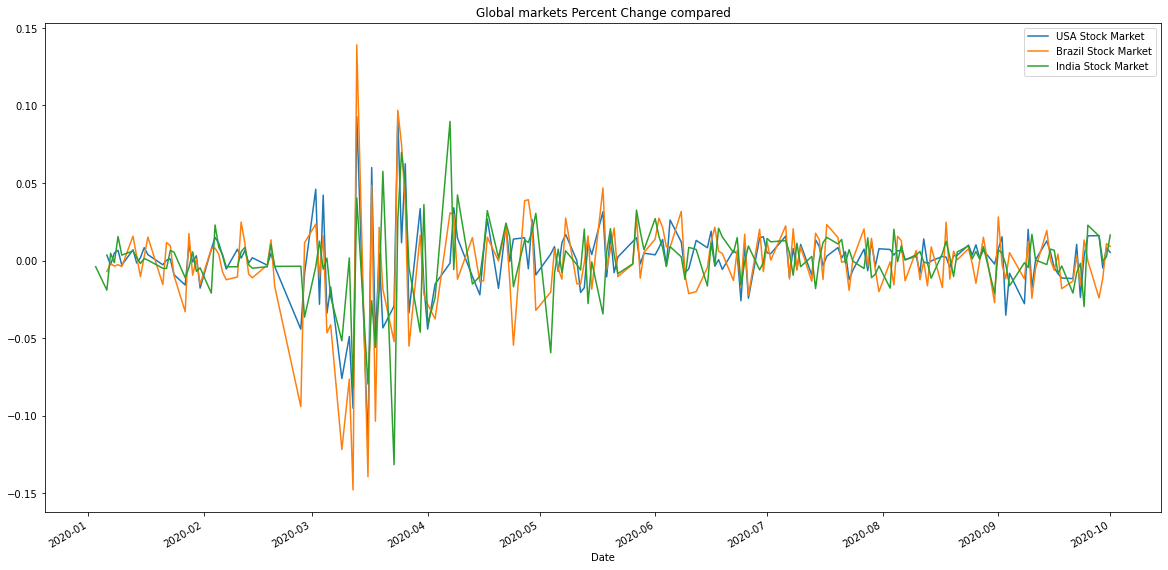

In [150]:
global_daily_returns.plot(title = 'Global markets Percent Change compared', figsize = (20,10))

In [155]:
global_daily_corona = pd.concat([US_coronavirus_data_returns, Brazil_coronavirus_returns, India_coronavirus_data], axis='columns', join='inner')
global_daily_corona.columns = [
  'USA Confirmed',
  'USA Deaths',
  'Brazil Confirmed',
  'Brazil Deaths',
  'India Deaths',
  'India Confirmed',
]
global_daily_corona_clean = global_daily_corona.dropna()
global_daily_corona_clean

,USA Confirmed,USA Deaths,Brazil Confirmed,Brazil Deaths,India Deaths,India Confirmed
2020-03-17,0.408486,0.350515,0.243590,inf,0.500000,0.201754
2020-03-18,0.452044,0.435115,0.470790,3.000000,0.000000,0.102190
2020-03-19,0.587642,0.409574,0.450935,0.500000,0.333333,0.145695
2020-03-20,366.528302,59.333333,0.455717,0.833333,0.000000,0.289017
2020-03-21,0.325787,0.259669,0.247788,0.636364,0.000000,0.269058
...,...,...,...,...,...,...
2020-07-05,0.017557,0.002090,0.016519,0.009367,13.379032,10.057006
2020-07-06,0.015549,0.002501,0.012619,0.009558,2.886147,3.657577
2020-07-07,0.020443,0.009172,0.027909,0.019149,1.909511,1.918018
2020-07-08,0.019559,0.006237,0.026712,0.018325,1.062748,1.816691


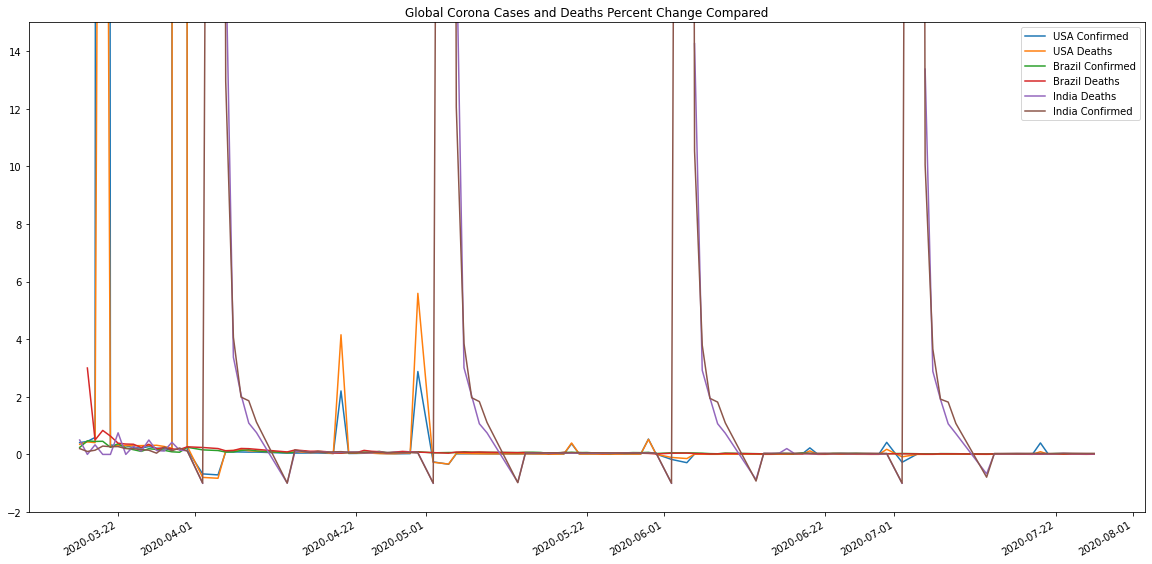

In [216]:
global_daily_corona_clean.plot(title = 'Global Corona Cases and Deaths Percent Change Compared', figsize = (20,10), ylim = (-2, 15))

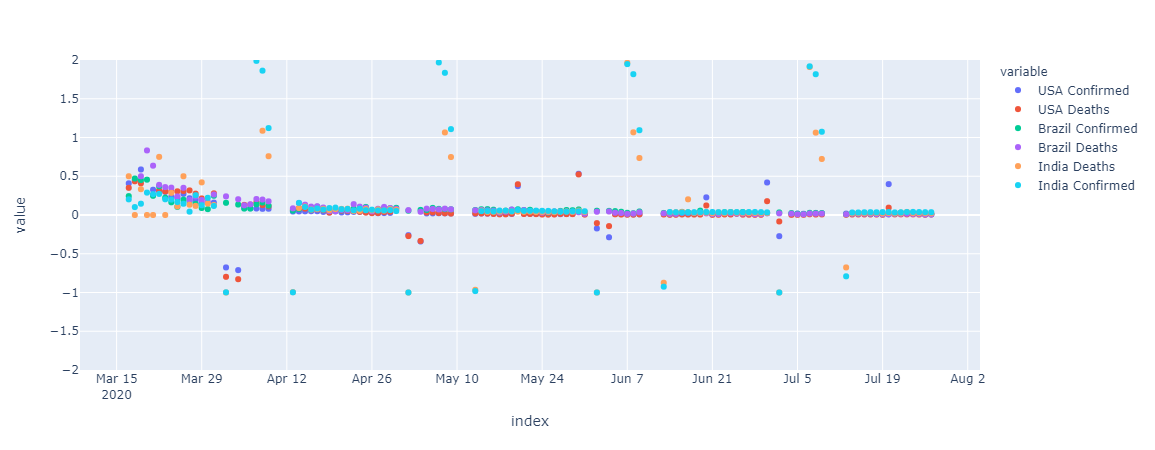

In [229]:
scatter_global_daily_corona_clean = px.scatter((global_daily_corona_clean), range_y=(-2, 2))
scatter_global_daily_corona_clean

In [160]:
global_daily_corona_raw = pd.concat([US_coronavirus_data, Brazil_coronavirus_data], axis='columns', join='inner')
global_daily_corona_raw.columns = [
  'USA Confirmed',
  'USA Deaths',
  'Brazil Confirmed',
  'Brazil Deaths',
]
global_daily_corona_raw_clean = global_daily_corona_raw.dropna()
global_daily_corona_raw_clean

,USA Confirmed,USA Deaths,Brazil Confirmed,Brazil Deaths
2020-02-25,15,0,0,0
2020-02-26,15,0,1,0
2020-02-27,16,0,1,0
2020-02-28,16,0,1,0
2020-02-29,24,1,2,0
...,...,...,...,...
2020-07-05,2891124,129960,1603055,64867
2020-07-06,2936077,130285,1623284,65487
2020-07-07,2996098,131480,1668589,66741
2020-07-08,3054699,132300,1713160,67964


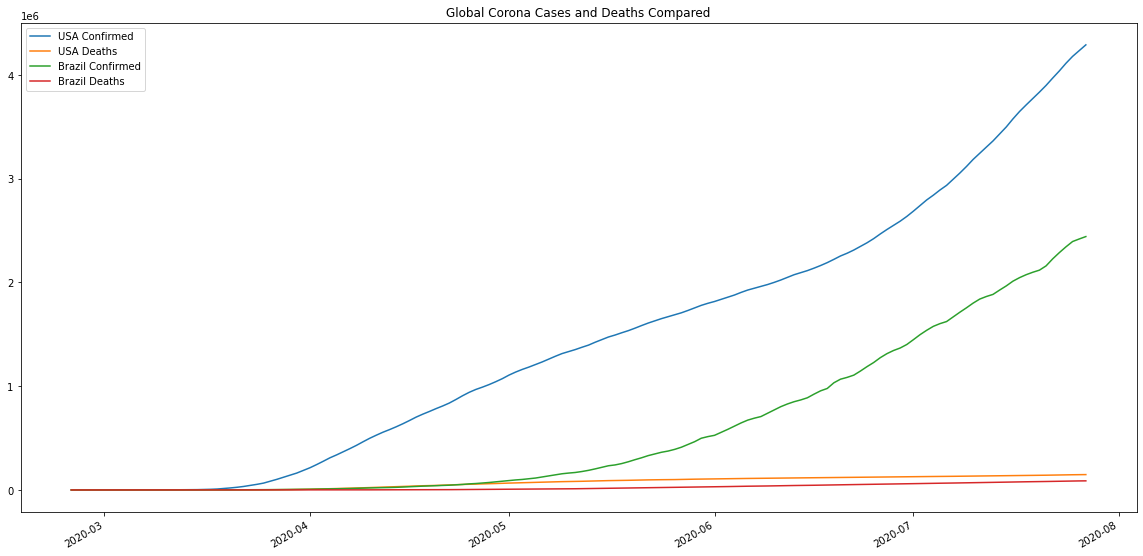

In [161]:
global_daily_corona_raw_clean.plot(title = 'Global Corona Cases and Deaths Compared', figsize = (20,10))

In [167]:
import pandas as pd
import plotly.express as px
import os
from pathlib import Path
from dotenv import load_dotenv

In [181]:
# Set up API credentials
# Read the Mapbox API key
load_dotenv()
map_box_api = "pk.eyJ1IjoiYmpvcm5rc2hvZmZtYW4iLCJhIjoiY2tmb3FvOGllMXFnNzM4cXVhdGtuOWNrbSJ9.SreGTVzuAXW_9ELF07KkLA"

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

In [209]:
mapbox_data = {'Country':  ['USA', 'India', 'Brazil'],
        'Latitude': [40.4251, 28.3907, -22.5410],
        'Longitude': [-74.0021, 77.1353, -43.1227],
        'Coronavirus Cases': [7.459, 6.685, 4.969],
        }

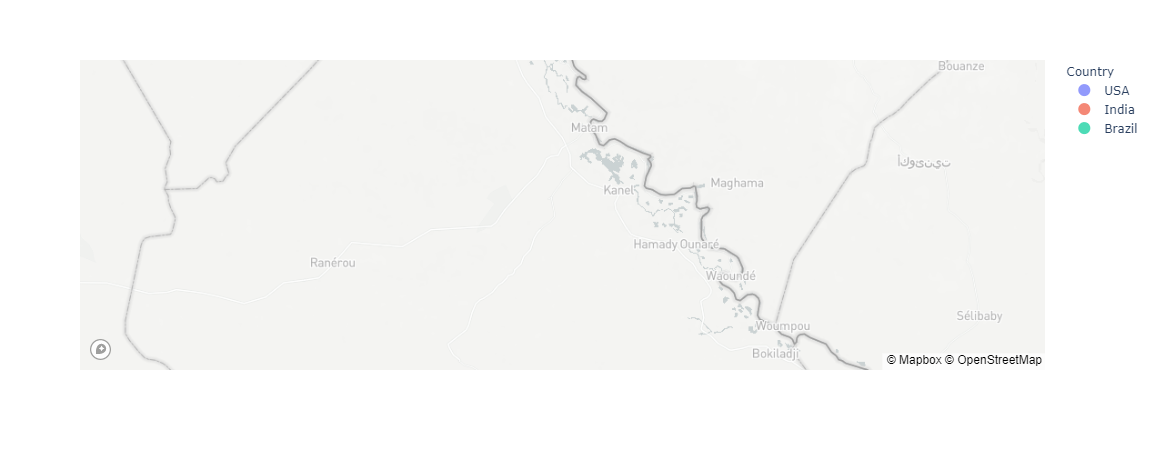

In [210]:
# Slice and plot data by name
map_1 = px.scatter_mapbox(
    mapbox_data,
    lat="Latitude",
    lon="Longitude",
    color="Country",
    size="Coronavirus Cases",
)
map_1.show()

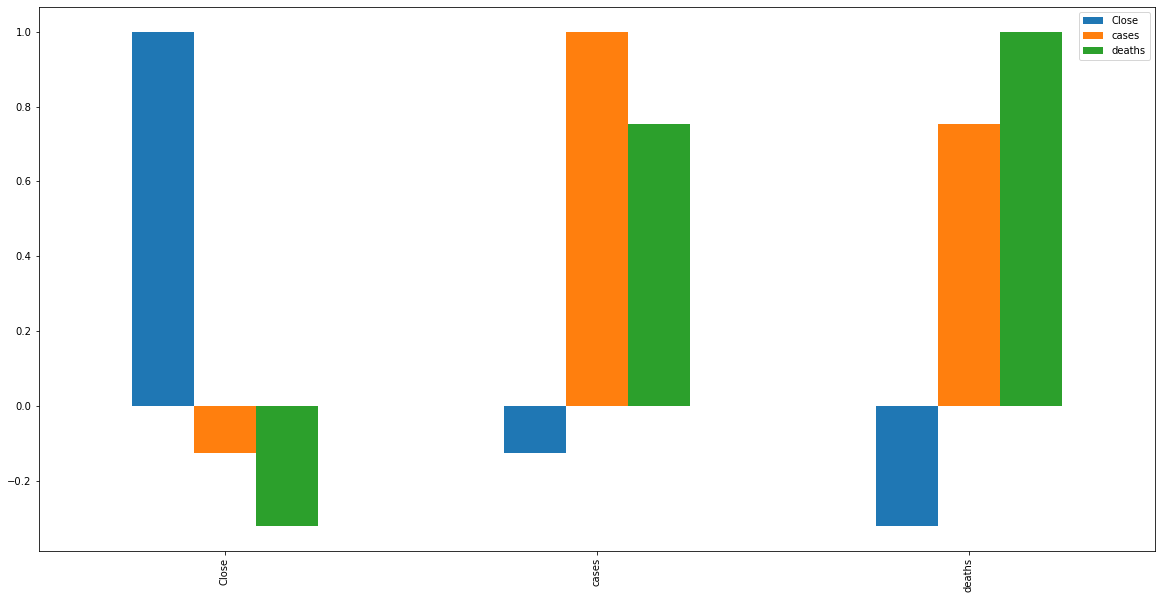

In [242]:
brazil_correlation.plot(kind='bar', figsize = (20,10))

In [238]:
correllation_df = pd.concat([US_correlation, brazil_correlation, india_correlation], axis='columns', join='inner')


,Close,Confirmed,Deaths,Close,cases,deaths,Close,India Deaths,India Confirmed
Close,1.0,0.051573,0.019359,1.0,-0.127437,-0.321546,1.0,0.008104,-0.006503


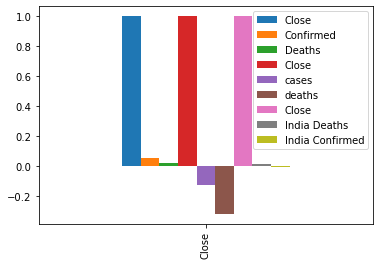

In [239]:
correllation_df.plot(kind='bar')

In [ ]:
correllation_df.columns = [
  'US_correlation',
  'brazil_correlation',
  'india_correlation'
]

In [240]:
import panel as pn
from panel.interact import interact
from panel import widgets

ModuleNotFoundError: No module named 'panel'

In [241]:
from bokeh.plotting import figure, output_file, show

# prepare some data
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]

# output to static HTML file
output_file("lines.html")

# create a new plot with a title and axis labels
p = figure(title="simple line example", x_axis_label='x', y_axis_label='y')

# add a line renderer with legend and line thickness
p.line(x, y, legend_label="Temp.", line_width=2)

# show the results
show(p)